For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.


## Import Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score , classification_report,silhouette_score


#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans


## Get the Data

**Read in the Data file. Figure out how to set the first column as the index.**

In [160]:
file_path=r'C:\Users\Ahmed Ashraf\Desktop\computer and information system\Route AI\Data\Kmeans.csv'
df=pd.read_csv(file_path , index_col=0)

**Check the head of the data**

In [161]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15



## Data Description

* **Private A factor with levels No and Yes indicating private or public university**
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

**Get the data info**

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

**Get the data description**

In [163]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

**Create a scatterplot of Grad.Rate versus Room Board
the points are colored by the Private column**

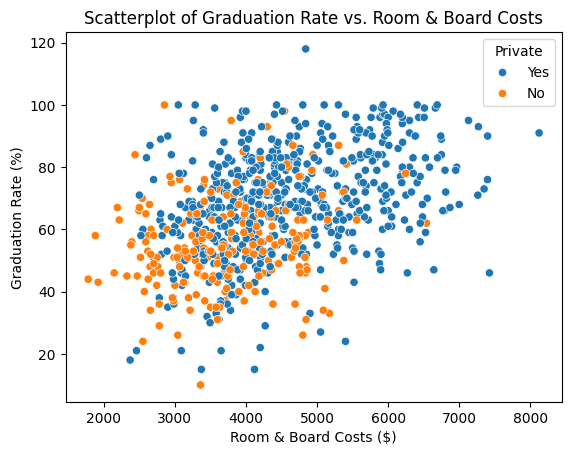

In [164]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', hue='Private', data=df)
plt.xlabel('Room & Board Costs ($)')
plt.ylabel('Graduation Rate (%)')
plt.title('Scatterplot of Graduation Rate vs. Room & Board Costs')
plt.legend(title='Private')
plt.show()


**Create a scatterplot of F.Undergrad versus Outstate
where the points are colored by the Private column.**

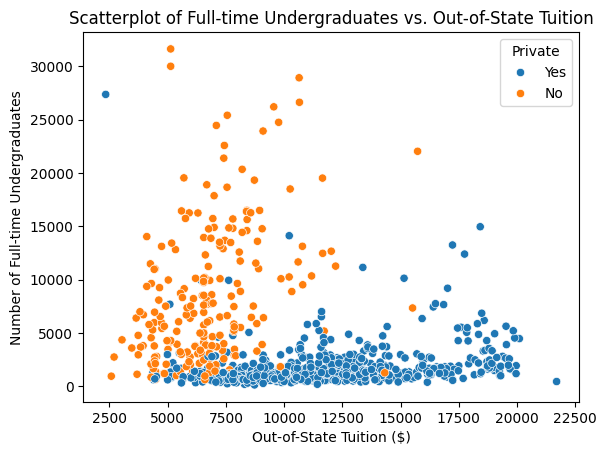

In [165]:
sns.scatterplot(x='Outstate' , y='F.Undergrad' , hue='Private' , data=df)
plt.xlabel('Out-of-State Tuition ($)')
plt.ylabel('Number of Full-time Undergraduates')
plt.title('Scatterplot of Full-time Undergraduates vs. Out-of-State Tuition')
plt.legend(title='Private')
plt.show()

**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html).
If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

In [166]:
df.index

Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', length=777)

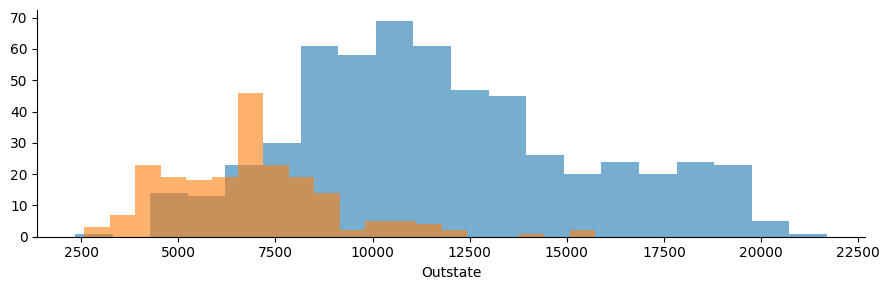

In [167]:
g=sns.FacetGrid(df , hue='Private' , aspect=3)
g.map(plt.hist, "Outstate", bins=20, alpha=0.6)
plt.show()


**Create a similar histogram for the Grad.Rate column.**

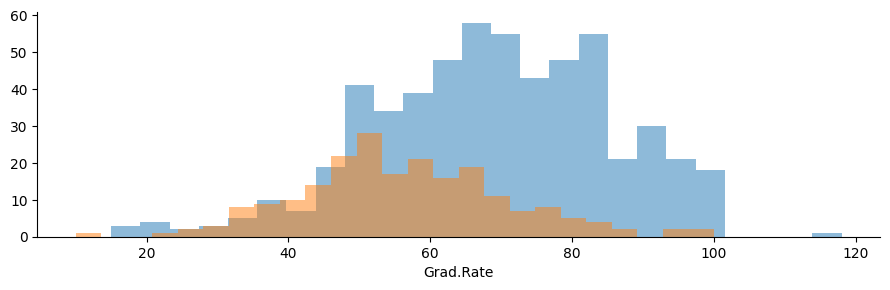

In [168]:
h=sns.FacetGrid(df , hue='Private' , aspect=3)
h.map(plt.hist , 'Grad.Rate' ,bins=25 , alpha=0.5)

**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [169]:
school_name = df[(df['Private'] == 'Yes') & (df['Grad.Rate'] > 100)]
school_name


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [170]:
df.loc[(df['Private'] == 'Yes') & (df['Grad.Rate'] > 100), 'Grad.Rate'] = df['Grad.Rate'].replace(118, 100)


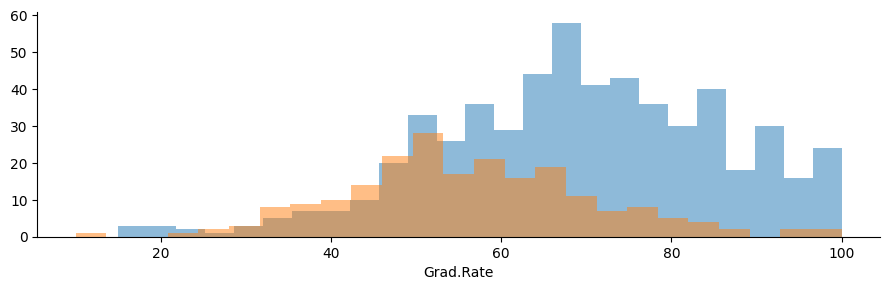

In [171]:
h=sns.FacetGrid(df , hue='Private' , aspect=3)
h.map(plt.hist , 'Grad.Rate' ,bins=25 , alpha=0.5)

Encoding Private Column

In [172]:
df['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [173]:
Private_Converted=pd.get_dummies(df['Private'] , drop_first=True , dtype='int')
df=pd.concat([df , Private_Converted],axis=1) 

In [174]:
df.drop('Private' , axis=1 , inplace=True)

In [175]:
df.head()
df.rename(columns={'Yes' :'Private'} , inplace=True)

-------

## K Means Clustering

**Apply Elbow Method to determine the best number of clusters**

In [176]:
wcss = []
silhouette_scores = [] 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

**Also show me a graph of the elbow method**

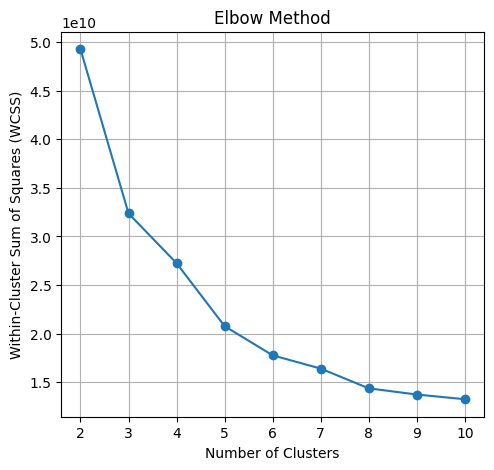

In [177]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

**Also show the silhoutte score**

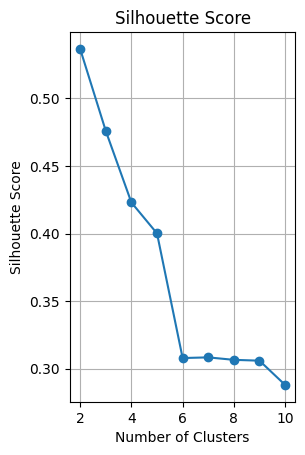

In [178]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**Fit the KMeans model with the best number of clusters**

In [179]:
best_k =9
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=9, random_state=42)

**print the clusters center**

In [180]:
print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[1.04462288e+03 7.68326271e+02 3.33427966e+02 1.86059322e+01
  4.49872881e+01 1.43261441e+03 4.83966102e+02 7.50480932e+03
  3.70615678e+03 5.33550847e+02 1.39511864e+03 6.20847458e+01
  6.91949153e+01 1.51919492e+01 1.80508475e+01 6.70631780e+03
  5.73177966e+01 7.50000000e-01]
 [1.73230556e+04 1.18690556e+04 4.60588889e+03 4.08888889e+01
  7.40555556e+01 2.38605000e+04 3.02100000e+03 8.60794444e+03
  4.22550000e+03 6.08944444e+02 1.80994444e+03 8.75555556e+01
  9.24444444e+01 1.66944444e+01 1.76111111e+01 1.02187778e+04
  6.74444444e+01 5.55555556e-02]
 [2.60767925e+03 1.67562264e+03 5.01424528e+02 4.50660377e+01
  7.46698113e+01 1.93707547e+03 1.78509434e+02 1.67152547e+04
  5.30159434e+03 5.73509434e+02 9.79490566e+02 8.64528302e+01
  9.27169811e+01 1.09537736e+01 3.56132075e+01 1.51060660e+04
  7.87264151e+01 1.00000000e+00]
 [7.63142857e+03 2.76785714e+03 1.02357143e+03 7.00000000e+01
  8.74285714e+01 4.01071429e+03 4.97142857e+02 1.76758571e+04
  5.64442857e+03

**Print your prediction**

In [181]:
print("Predictions:")
y_pred=kmeans.predict(df)
y_pred

Predictions:


array([0, 6, 6, 2, 0, 6, 6, 6, 2, 6, 2, 2, 6, 6, 0, 0, 2, 6, 6, 4, 3, 4,
       6, 1, 6, 0, 6, 7, 6, 6, 6, 6, 0, 0, 6, 6, 2, 2, 6, 4, 6, 0, 0, 0,
       2, 0, 0, 2, 6, 0, 0, 0, 0, 0, 6, 0, 4, 0, 6, 5, 2, 7, 2, 6, 2, 0,
       0, 6, 6, 1, 8, 2, 2, 6, 6, 6, 0, 6, 7, 7, 6, 0, 0, 6, 6, 0, 2, 8,
       6, 0, 6, 2, 0, 0, 2, 6, 6, 0, 6, 0, 6, 6, 4, 4, 4, 0, 6, 2, 2, 6,
       6, 0, 0, 0, 2, 2, 6, 2, 7, 0, 6, 6, 2, 2, 6, 4, 0, 6, 6, 6, 6, 6,
       6, 0, 6, 0, 6, 2, 4, 2, 2, 7, 0, 6, 8, 0, 0, 6, 0, 2, 6, 6, 2, 0,
       0, 0, 0, 6, 8, 2, 6, 0, 2, 6, 2, 0, 0, 0, 0, 0, 6, 6, 2, 0, 8, 2,
       7, 4, 0, 6, 0, 4, 6, 0, 2, 6, 6, 6, 0, 4, 0, 8, 0, 6, 6, 0, 2, 0,
       0, 0, 6, 4, 0, 7, 0, 6, 4, 0, 0, 6, 6, 0, 0, 2, 6, 0, 0, 6, 4, 2,
       0, 8, 4, 4, 0, 2, 0, 6, 6, 6, 2, 6, 0, 4, 6, 0, 6, 2, 0, 6, 6, 6,
       2, 6, 6, 4, 0, 0, 0, 2, 3, 2, 0, 0, 6, 6, 2, 4, 2, 6, 6, 6, 0, 6,
       0, 0, 6, 0, 2, 7, 6, 6, 0, 4, 1, 0, 6, 7, 6, 7, 4, 4, 0, 6, 3, 0,
       0, 2, 7, 0, 0, 0, 2, 0, 6, 0, 2, 0, 6, 2, 0,

In [182]:
df['Cluster']=y_pred
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,6
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,6
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,2
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,0
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,6
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,0
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,3


In [187]:
features = df.drop(columns=['Private', 'Cluster'])
label = df['Cluster']


In [188]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]
df3=df[df.Cluster==3]
df4=df[df.Cluster==4]
df5=df[df.Cluster==5]
df6=df[df.Cluster==6]
df7=df[df.Cluster==7]
df8=df[df.Cluster==8]
df9=df[df.Cluster==9]

In [189]:
df0

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0
Alverno College,494,313,157,23,46,1317,1235,8352,3640,650,2449,36,69,11.1,26,8127,55,1,0
American International College,1420,1093,220,9,22,1018,287,8700,4780,450,1400,78,84,14.7,19,7355,69,1,0
Arkansas Tech University,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winthrop University,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59,0,0
Wisconsin Lutheran College,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50,1,0
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,0
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,0


**Provide me with one or more scatter plot showing the clusters**

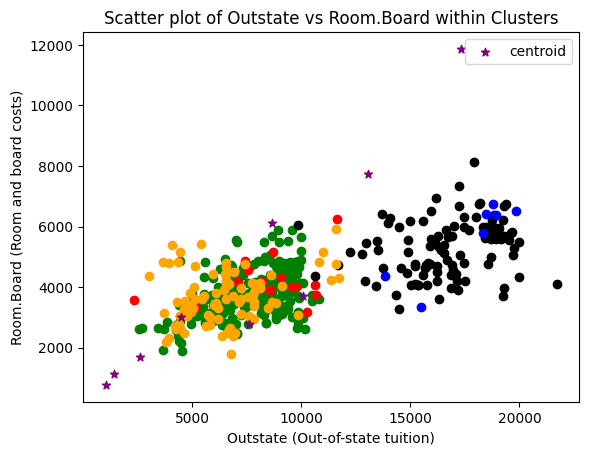

In [201]:
plt.scatter(df0['Outstate'], df0['Room.Board'], color='green')
plt.scatter(df1['Outstate'], df1['Room.Board'], color='red')
plt.scatter(df2['Outstate'], df2['Room.Board'], color='black')
plt.scatter(df3['Outstate'], df3['Room.Board'], color='blue')
plt.scatter(df4['Outstate'], df4['Room.Board'], color='orange')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()
plt.show()
#idk if this true or not but I tried

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [ ]:
#I Did it above (Encoding Private Column)

Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!